# Information Metrics

Run information theory metrics on time series signals.

In [1]:
from neurodsp.sim import *

import matplotlib.pyplot as plt

import seaborn as sns
sns.set_context('talk')

In [2]:
# Import custom code
import sys; from pathlib import Path
sys.path.append(str(Path('..').resolve()))

from apm.run import run_sims
from apm.plts.settings import AP_COL, COMB_COL

In [3]:
from code.entropy import samp_entropy, permutation_entropy, ap_entropy

## Settings

In [4]:
# Simulation settings
n_seconds = 1
fs = 1000

default_exp = -1.5
default_freq = 10

# Set up the simulation parameters
sim_params_pow = {'n_seconds' : n_seconds, 'fs' : fs}
sim_params_comb = {'n_seconds' : n_seconds, 'fs' : fs,
                   'components' : {'sim_powerlaw' : {'exponent' : default_exp, 'f_range' : (1, None)},
                                   'sim_oscillation' : {'freq' : default_freq}}, 
                   'component_variances' : [1, 1]}

# Set the number of instances to run
n_instances = 25

# Settings for entropy measures
sa_measure_params = {'M' : 2, 'R' : 1}     # Sample Entropy
pe_measure_params = {'n' : 5, 'tau' : 1}   # Permutation Entropy
ap_measure_params = {'M' : 5, 'R' : 1}     # Approximate Entropy

# Set the range of values to simulate across
exps = np.arange(-3, 0.25, 0.25)
freqs = np.arange(5, 35, 5)
pows = np.arange(0, 2, 0.1)

In [5]:
SAVE_FIG = True

## Calculating Entropy Measures on Example Signals

#### Powerlaw Signals

In [6]:
# Set a test exponent value
exp = -2

In [7]:
# Simulate a powerlaw signal
sig = sim_powerlaw(n_seconds, fs, exponent=exp)

In [8]:
# Calculate the entropy of the signal
pow_sa_ent = samp_entropy(sig, **sa_measure_params)

In [9]:
print('Calculated sample entropy: \t {:1.4f}'.format(pow_sa_ent))

Calculated sample entropy: 	 0.0227


#### Powerlaw Signals with a Knee

In [10]:
# Expected exp for a synpatic activity signal, with a knee
exp_kn = -2

In [11]:
# Simulate a signal with a knee
sig_kn = sim_synaptic_current(n_seconds, fs)

In [12]:
# Calculate the entropy of the signal
kn_sa_ent = samp_entropy(sig_kn, **sa_measure_params)

In [13]:
print('Calculated sample entropy: \t {:1.4f}'.format(kn_sa_ent))

Calculated sample entropy: 	 0.2350


## Entropy Simulations - Aperiodic & Periodic

Calculate entropy measures on simulated powerlaw signals, with and without oscillations. 

#### Sample Entropy

In [14]:
# Run a set of simulations, calculating sample entropy across exponents
sa_ents = run_sims(sim_powerlaw, sim_params_pow, samp_entropy, sa_measure_params,
                   update='update_exp', values=exps, n_instances=n_instances)

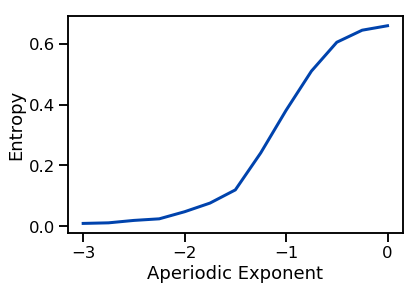

In [15]:
# Plot sample entropy measures across exponent values
plt.plot(exps, sa_ents, lw=3, color=AP_COL)

plt.xlabel('Aperiodic Exponent')
plt.ylabel('Entropy');

In [16]:
# Run a set of simulations, calculating sample entropy across exponents, with an oscillation
sa_ents_comb = run_sims(sim_combined, sim_params_comb, samp_entropy, sa_measure_params,
                        update='update_comb_exp', values=exps, n_instances=n_instances)

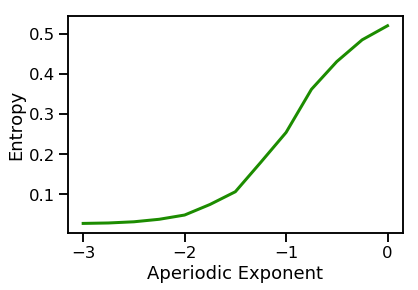

In [17]:
# Plot sample entropy measures across exponent values
plt.plot(exps, sa_ents_comb, lw=3, color=COMB_COL)

plt.xlabel('Aperiodic Exponent')
plt.ylabel('Entropy');

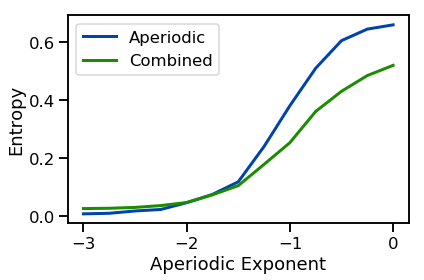

In [18]:
# Plot entropy measures for with & without oscillation together
plt.plot(exps, sa_ents, label='Aperiodic', lw=3, color=AP_COL)
plt.plot(exps, sa_ents_comb, label='Combined', lw=3, color=COMB_COL)

plt.xlabel('Aperiodic Exponent')
plt.ylabel('Entropy');

plt.tight_layout()
plt.legend()

if SAVE_FIG: plt.savefig('plts/ent-sa-ap.pdf')

#### Permutation Entropy

In [19]:
# Run a set of simulations, calculating permutation entropy across exponents
pe_ents = run_sims(sim_powerlaw, sim_params_pow, permutation_entropy, pe_measure_params,
                   update='update_exp', values=exps, n_instances=n_instances)

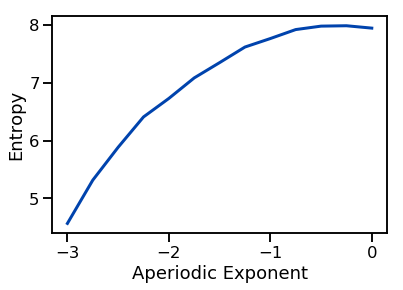

In [20]:
# Plot permutation entropy measures across exponent values
plt.plot(exps, pe_ents, lw=3, color=AP_COL)

plt.xlabel('Aperiodic Exponent')
plt.ylabel('Entropy');

In [21]:
# Run a set of simulations, calculating permutation entropy across exponents, with an oscillation
pe_ents_comb = run_sims(sim_combined, sim_params_comb, permutation_entropy, pe_measure_params,
                   update='update_comb_exp', values=exps, n_instances=n_instances)

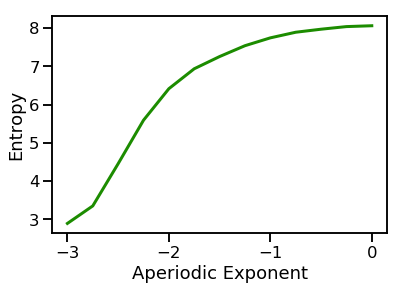

In [22]:
# Plot permutation entropy measures across exponent values, with an oscillation
plt.plot(exps, pe_ents_comb, lw=3, color=COMB_COL)

plt.xlabel('Aperiodic Exponent')
plt.ylabel('Entropy');

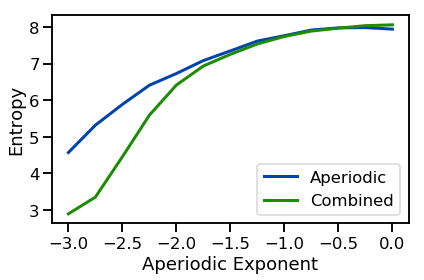

In [23]:
# Plot entropy measures for with & without oscillation together
plt.plot(exps, pe_ents, label='Aperiodic', lw=3, color=AP_COL)
plt.plot(exps, pe_ents_comb, label='Combined', lw=3, color=COMB_COL)

plt.xlabel('Aperiodic Exponent')
plt.ylabel('Entropy');

plt.tight_layout()
plt.legend()

if SAVE_FIG: plt.savefig('plts/ent-pe-ap.pdf')

#### Approximate Entropy

In [24]:
# Run a set of simulations, calculating approximate entropy across exponents
ap_ents = run_sims(sim_powerlaw, sim_params_pow, ap_entropy, ap_measure_params, 
                   update='update_exp', values=exps, n_instances=n_instances)

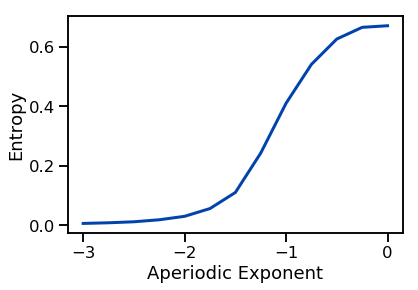

In [25]:
# Plot approximate entropy measures across exponent values
plt.plot(exps, ap_ents, lw=3, color=AP_COL)

plt.xlabel('Aperiodic Exponent')
plt.ylabel('Entropy');

In [26]:
# Run a set of simulations, calculating approximate entropy across exponents, with an oscillation present
ap_ents_comb = run_sims(sim_combined, sim_params_comb, ap_entropy, ap_measure_params, 
                        update='update_comb_exp', values=exps, n_instances=n_instances)

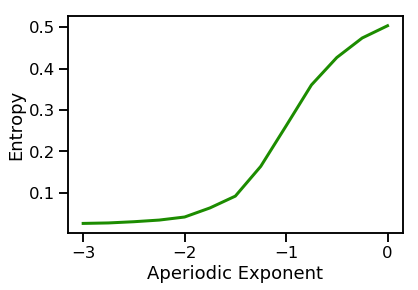

In [27]:
# Plot approximate entropy measures across exponent values, with an oscillation present
plt.plot(exps, ap_ents_comb, lw=3, color=COMB_COL)

plt.xlabel('Aperiodic Exponent')
plt.ylabel('Entropy');

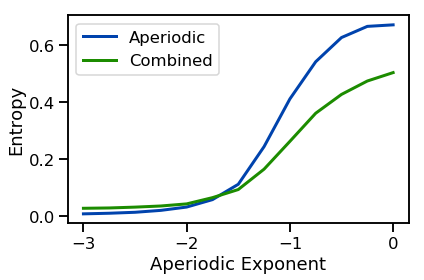

In [28]:
# Plot entropy measures for with & without oscillation together
plt.plot(exps, ap_ents, label='Aperiodic', lw=3, color=AP_COL)
plt.plot(exps, ap_ents_comb, label='Combined', lw=3, color=COMB_COL)

plt.xlabel('Aperiodic Exponent')
plt.ylabel('Entropy');

plt.tight_layout()
plt.legend()

if SAVE_FIG: plt.savefig('plts/ent-ap-ap.pdf')

## Entropy Simulations - Combined Signal with Oscillations

Calculate entropy measures on simulated combined signals, with an oscillation and powerlaw components.

#### Sample Entropy

In [29]:
# Run a set of simulations, calculating sample entropy across oscillation frequency
sa_sims_freq = run_sims(sim_combined, sim_params_comb, samp_entropy, sa_measure_params,
                        update='update_freq', values=freqs, n_instances=n_instances)

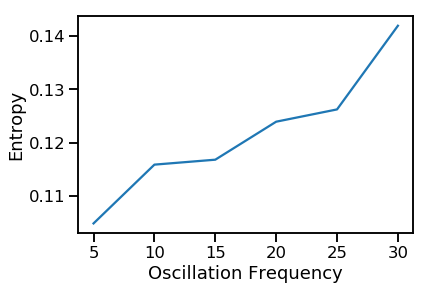

In [30]:
# Plot sample entropy measures across oscillation frequency values
plt.plot(freqs, sa_sims_freq)

plt.xlabel('Oscillation Frequency')
plt.ylabel('Entropy');

In [31]:
# Run a set of simulations, calculating sample entropy across oscillation power
sa_sims_pow = run_sims(sim_combined, sim_params_comb, samp_entropy, sa_measure_params,
                       update='update_pow', values=pows, n_instances=n_instances)

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


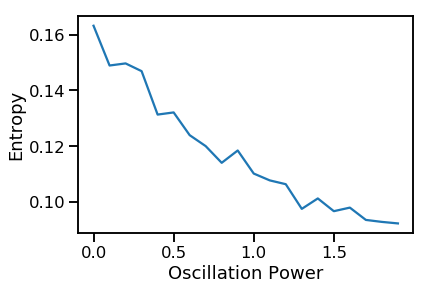

In [32]:
# Plot sample entropy measures across oscillation power values
plt.plot(pows, sa_sims_pow)

plt.xlabel('Oscillation Power')
plt.ylabel('Entropy');

#### Permutation Entropy

In [33]:
# Run a set of simulations, calculating permutation entropy across oscillation frequency
pe_sims_freq = run_sims(sim_combined, sim_params_comb, permutation_entropy, pe_measure_params,
                        update='update_freq', values=freqs, n_instances=n_instances)

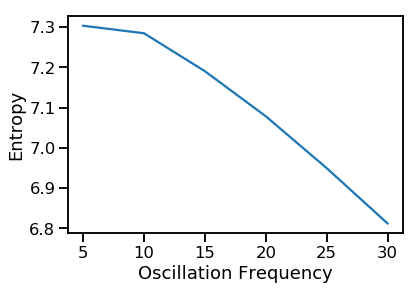

In [34]:
# Plot permutation entropy measures across oscillation frequency values
plt.plot(freqs, pe_sims_freq)

plt.xlabel('Oscillation Frequency')
plt.ylabel('Entropy');

In [35]:
# Run a set of simulations, calculating permutation entropy across oscillation power
pe_sims_pow = run_sims(sim_combined, sim_params_comb, permutation_entropy, pe_measure_params,
                       update='update_pow', values=pows, n_instances=n_instances)

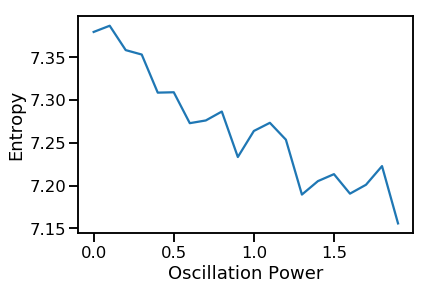

In [36]:
# Plot permutation entropy measures across oscillation power values
plt.plot(pows, pe_sims_pow)

plt.xlabel('Oscillation Power')
plt.ylabel('Entropy');

#### Approximate Entropy

In [37]:
# Run a set of simulations, calculating approximate entropy across oscillation frequency
ap_sims_freq = run_sims(sim_combined, sim_params_comb, ap_entropy, ap_measure_params,
                        update='update_freq', values=freqs, n_instances=n_instances)

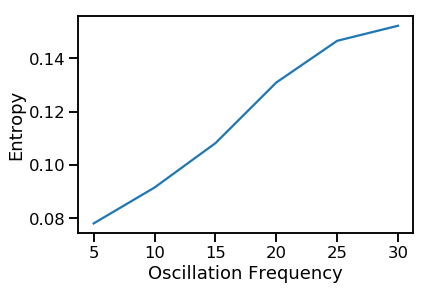

In [38]:
# Plot approximate entropy measures across oscillation frequency values
plt.plot(freqs, ap_sims_freq)

plt.xlabel('Oscillation Frequency')
plt.ylabel('Entropy');

In [39]:
# Run a set of simulations, calculating approximate entropy across oscillation power
ap_sims_pow = run_sims(sim_combined, sim_params_comb, ap_entropy, ap_measure_params,
                       update='update_pow', values=pows, n_instances=n_instances)

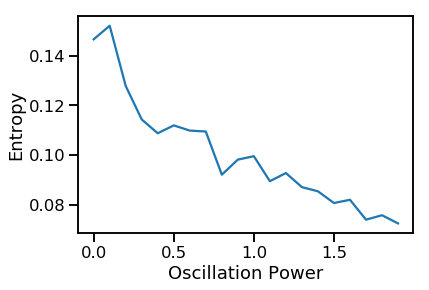

In [40]:
# Plot approximate entropy measures across oscillation power values
plt.plot(pows, ap_sims_pow)

plt.xlabel('Oscillation Power')
plt.ylabel('Entropy');